#  From <font color='organge'>"manual"</font> learning to <font color='brown'>"machine"</font> learning
## A Simple linear classifier in [TensorFlow](https://www.tensorflow.org/) (logistic regression)

![Image TensorFlow](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/220px-TensorFlowLogo.svg.png)


* <font size=5 color='green'>[MSTC](http://mstc.ssr.upm.es/big-data-track) Introduction to Deep Learning using Tensorflow & Keras</font>

In [0]:
import tensorflow as tf

### Generate two-class artificial data using $numpy$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Number of data per-class
Ndata_class=100

group1 = np.random.multivariate_normal([-4, -4], 20*np.identity(2), size=Ndata_class)
group2 = np.random.multivariate_normal([4, 4], 20*np.identity(2), size=Ndata_class)

In [0]:
group1.shape

(100, 2)

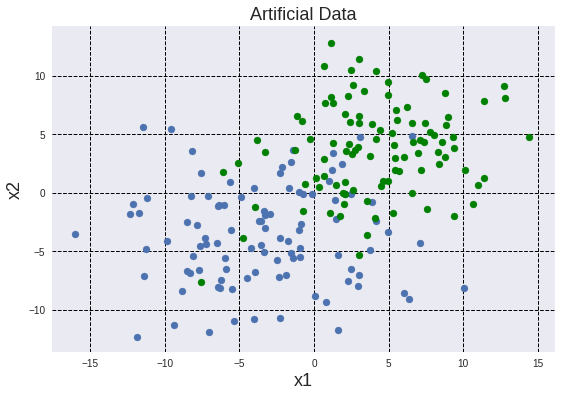

In [0]:
# Plot artificial data
plt.figure(figsize=(9,6))
plt.scatter(group1[:,0],group1[:,1])
plt.scatter(group2[:,0],group2[:,1],color='g')
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.title('Artificial Data',fontsize=18)
plt.grid(color='k', linestyle='--')

### "manual" linear discrimination
* w2\*x2 + w1\*x1 + w0 = 0
<br>or,  with w2=1
* x2 = -w1*x1 - w0



---

## ... try with some coefficients...

In [0]:
x1 = np.arange(-15, 15, 0.1)

w2=1

w0=-5
w1=0.5
#w1=1.0

x2= - w1 * x1 - w0 

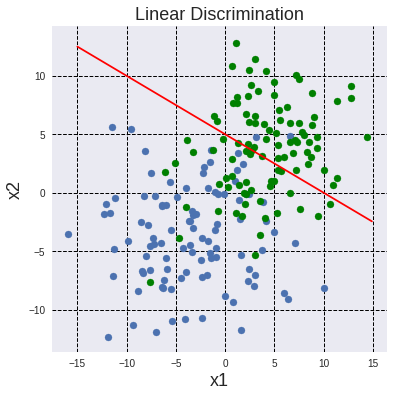

In [0]:
# Plot linear discrimination
plt.figure(figsize=(6,6))
plt.scatter(group1[:,0],group1[:,1])
plt.scatter(group2[:,0],group2[:,1],color='g')
plt.plot(x1,x2,color='r')

plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.title('Linear Discrimination',fontsize=18)
plt.grid(color='k', linestyle='--')


In [0]:
# Move this to the previous plot
'''
w0_up=w0-3
x2_up= - w1 * x1 - w0_up
plt.plot(x1,x2_up,color='g')

w0_down=w0+3
x2_down= - w1 * x1 - w0_down
plt.plot(x1,x2_down,color='b')

'''

# ... the move this to plot coef vector [w1,w2]

'''
mult=3
plt.quiver([w1*mult],[w2*mult], angles='xy', scale_units='xy', scale=1
'''

"\nmult=3\nplt.quiver([w1*mult],[w2*mult], angles='xy', scale_units='xy', scale=1\n"

### Classification based on the distance to the line

* w2\*x2 + w1\*x1 + w0 > 0  'green' points
* w2\*x2 + w1\*x1 + w0 < 0  'blue' points


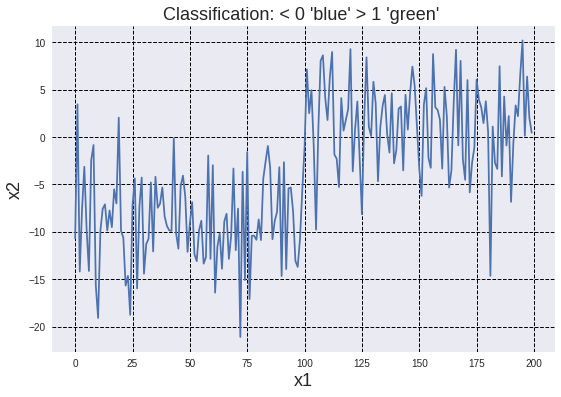

In [0]:
train_X = np.vstack((group1, group2)) 
pred= w1*train_X[:,0] + w2*train_X[:,1] + w0

plt.figure(figsize=(9,6))
plt.plot(pred)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.title('Classification: < 0 \'blue\' > 1 \'green\' ',fontsize=18)
plt.grid(color='k', linestyle='--')

### let's make these values "probabilities" using the $sigmoid$ function

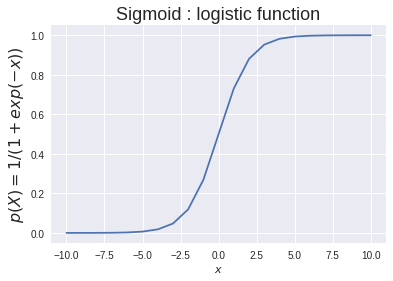

In [0]:
x = np.arange(-10, 11)
plt.title('Sigmoid : logistic function',fontsize=18)
plt.xlabel('$x$')
plt.ylabel('$p(X)=1/(1+exp(-x))$',fontsize=16)
plt.plot(x, (1/(1+np.exp(-x))));



####     Prediction using the $logistic$ or $sigmoid$ function 
* $p(X) = 1/(1 + \exp(x))$, taking values between $0$ and $1$.

* $p(X)$ represents the probability that the point $X$ should be labelled "green".


Text(0,0.5,'$p(X)=1/(1+exp(-pred))$')

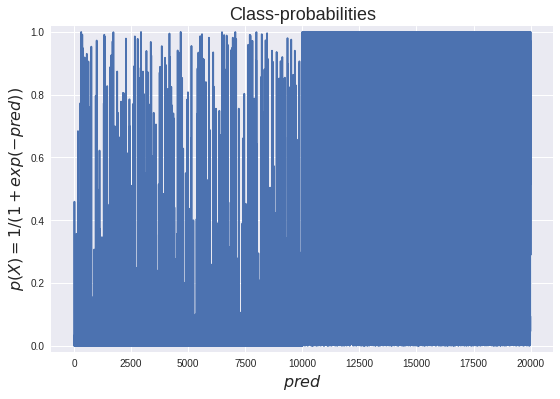

In [0]:
plt.figure(figsize=(9,6))
plt.plot((1/(1+np.exp(-pred))))
plt.ylim(-0.02, 1.02)

plt.title('Class-probabilities',fontsize=18)
plt.xlabel('$pred$',fontsize=16)
plt.ylabel('$p(X)=1/(1+exp(-pred))$',fontsize=16)


###  Classification cost function will be the cross-entropy, $$-\sum_{i=1}^n l(X_i) \log(p(X_i)) + (1-l(X_i))\log(1-p(X_i)),$$ where $l(X_i)$ is the label of $X_i$ (which is $0$ for 'blue' or $1$ for 'green').


In [0]:
train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)

### ... try calculate cross-entropy

In [0]:
# Cost function is cross-entropy
pred_prob=(1/(1+np.exp(-pred)))
cost = -.... 

print("cross-entropy: {}".format(cost))

cross-entropy: 13991.232010316724


### ... now calculate accurracy using 0.5 threshold

In [0]:
Accuracy=....

print("Classification Accuracy = ",Accuracy)

Classification Accuracy =  0.8063


## Using TensorFlow for:

- ## Feeding data into a "given" linear classifier with $sigmoid$ output

In [0]:
### GRAPH DEFINITION

# PLACEHOLDERS:
# Inputs are now two-dimensional and come with labels "blue" or "green" (represented by 0 or 1)
X = tf.placeholder("float", shape=[None, 2])
labels = tf.placeholder("float", shape=[None])


# Set model weights and bias as before
#W = tf.Variable(tf.ones([2, 1], "float"), name="weight")
#b = tf.Variable(tf.zeros([1], "float"), name="bias")

W=tf.constant([[w1], [w2]],name="weights")
b=tf.constant(np.float(w0),name="bias")


# Predictor is now the logistic function
#pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W), axis=[1]) + b))
pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W),1) + b))

# Cost function is cross-entropy
cost = -tf.reduce_sum(tf.to_double(labels) * tf.log(pred) + (1-tf.to_double(labels)) * tf.log(1-pred))


In [0]:
### GRAPH EXECUTION

# Initializing the variables
init = tf.global_variables_initializer()
#init = tf.initialize_all_variables()

# We stack our two groups of 2-dimensional points
train_X = np.vstack((group1, group2))

# labels to feed them
train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)


with tf.Session() as sess:
    
    sess.run(init)
    
    pred_out, cost_out=sess.run([pred, cost], feed_dict={X: train_X, labels: train_labels})

        

In [0]:
print("cross-entropy: {}".format(cost_out))

cross-entropy: 124.38412196288397


In [0]:
Accuracy=np.sum((pred_out>0.5).astype(int) == train_labels)/(len(pred_out)*1.0)

print("Classification Accuracy = ",Accuracy)

Classification Accuracy =  0.805


# Now let's train!



*   Both $W$ and $b$ are now <font size=4 color=green> variables</font>




In [0]:
# Inputs are now two-dimensional and come with labels "blue" or "green" (represented by 0 or 1)
X = tf.placeholder("float", shape=[None, 2])
labels = tf.placeholder("float", shape=[None])

# Set model weights and bias as before
W = tf.Variable(tf.zeros([2, 1], "float"), name="weight")
b = tf.Variable(tf.zeros([1], "float"), name="bias")

# Predictor is now the logistic function
#pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W), axis=[1]) + b))
pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W),1) + b))


# Cost function is cross-entropy
cost = -tf.reduce_sum(tf.to_double(labels) * tf.log(pred) + (1-tf.to_double(labels)) * tf.log(1-pred))

# Gradient descent
learning_rate = 0.00001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()
#init = tf.initialize_all_variables()

# We stack our two groups of 2-dimensional points
train_X = np.vstack((group1, group2))

# labels to feed them
train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)


with tf.Session() as sess:
    sess.run(init)
    
    # We can Run the optimization algorithm several times
    for i in range(10):
        #cost_out,W_out,b_out,pred_out,_=sess.run([cost, W,b, pred, optimizer], feed_dict={X: train_X, labels: train_labels})
        cost_out,W_out,b_out,pred_out,_=sess.run([cost, W,b, pred, optimizer], feed_dict={X: train_X, labels: train_labels})
        print("\n***** Epoch : %d \n Cost= %s "%(i,cost_out))
        print("Weights= ",format(W_out))
        print("bias= ",format(b_out))
        
        Accuracy=np.sum((pred_out>0.5).astype(int) == train_labels)/(len(pred_out)*1.0)

        print("Classification Accuracy = ",Accuracy)



***** Epoch : 0 
 Cost= 13862.943611199835 
Weights=  [[0.4020722 ]
 [0.39761496]]
bias=  [0.]
Classification Accuracy =  0.5

***** Epoch : 1 
 Cost= 4922.881122854136 
Weights=  [[0.4007413]
 [0.3994445]]
bias=  [-0.00031277]
Classification Accuracy =  0.89435

***** Epoch : 2 
 Cost= 4922.43443444454 
Weights=  [[0.39984348]
 [0.40077075]]
bias=  [-0.00062148]
Classification Accuracy =  0.8944

***** Epoch : 3 
 Cost= 4922.20569317142 
Weights=  [[0.39924544]
 [0.40173867]]
bias=  [-0.00092599]
Classification Accuracy =  0.8945

***** Epoch : 4 
 Cost= 4922.085617080735 
Weights=  [[0.39885372]
 [0.4024501 ]]
bias=  [-0.00122624]
Classification Accuracy =  0.8944

***** Epoch : 5 
 Cost= 4922.020033317143 
Weights=  [[0.39860305]
 [0.40297705]]
bias=  [-0.00152218]
Classification Accuracy =  0.8943

***** Epoch : 6 
 Cost= 4921.9820085344645 
Weights=  [[0.39844802]
 [0.40337053]]
bias=  [-0.00181383]
Classification Accuracy =  0.89435

***** Epoch : 7 
 Cost= 4921.958080555474 
We

### Now we train using batches


W =  [[0.37145045]
 [0.40487304]]
b =  [-0.0079251]


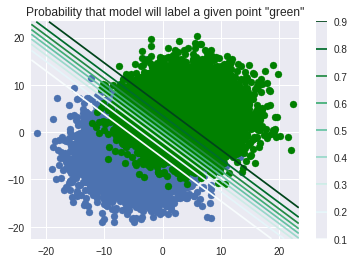

In [0]:
import matplotlib.cm as cm
import seaborn as sns

n_samples=Ndata_class*2
batch_size=40

with tf.Session() as sess:
    # We stack our two groups of 2-dimensional points and label them 0 and 1 respectively
    train_X = np.vstack((group1, group2))

    # labels to feed them
    train_labels = np.array([0.0] * Ndata_class + [1.0] * Ndata_class)


    sess.run(init)

    # Run the optimization algorithm 1000 times
    for i in range(1000):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, labels_batch = train_X[indices], train_labels[indices]
        sess.run(optimizer, feed_dict={X: X_batch, labels: labels_batch})

        
    # Plot the predictions: the values of p
    Xmin = np.min(train_X)-1
    Xmax = np.max(train_X)+1
    x = np.arange(Xmin, Xmax, 0.1)
    y = np.arange(Xmin, Xmax, 0.1)
    

    plt.scatter(group1.T[0][:],group1.T[1][:])
    plt.scatter(group2.T[0][:],group2.T[1][:],color='g')
    plt.xlim(Xmin, Xmax)
    plt.ylim(Xmin, Xmax)
    print('W = ', sess.run(W))
    print('b = ', sess.run(b))
    
    xx, yy = np.meshgrid(x, y)
    predictions = sess.run(pred, feed_dict={X: np.array((xx.ravel(), yy.ravel())).T})
    
    plt.title('Probability that model will label a given point "green"')
    plt.contour(x, y, predictions.reshape(len(x), len(y)), cmap=cm.BuGn, levels=np.arange(0.0, 1.1, 0.1))
    plt.colorbar()

## Logistic regression in TensorFlow

https://gist.github.com/fuglede/ad04ce38e80887ddcbeb6b81e97bbfbc

